# Проект по анализу рынка компьютерных игр
# Описание проекта

Поступила задачиа от интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Заказчик предоставил данные до 2016 года. Представим, что сейчас декабрь 2016 г., и магазин планирует компанию на 2017-й.

# Описание данных games.csv
Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы долларов)

EU_sales — продажи в Европе (миллионы долларов)

JP_sales — продажи в Японии (миллионы долларов)

Other_sales — продажи в других странах (миллионы долларов)

Critic_Score — оценка критиков (от 0 до 100)

User_Score — оценка пользователей (от 0 до 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

# Загрузка данных

In [1]:
# Вызов библиотек
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
#Загрузка файла с данными и общая информация
data = pd.read_csv('C:/Users/Acer_302/Downloads/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


То, что видно из обзора датасета:
1) Имена игр в тектовом формате, есть 2 пропуска
2) Названия платформ имеют текстовый формат, пропусков нет
3) Год выпуска имеет формат с плавающей точкой, есть несколько сотен пропусков
4) Жанр имеет текстовый формат и 2 пропуска
5) Объемы продаж имеют тип с плавающей точкой, без пропусков
6) Оценки критиков имеют много пропусков, тип с плавающей точкой
7) Оценки пользователей имеют текстовый тип и много пропусков
8) Возрастной рейтиг в текстовом формате, много пропусков

# Предподготовка данных

In [3]:
#Просмотр названий столбцов 
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [4]:
#Приведение названий столбцов к нижнему регистру методом rename()
data.rename(columns = {'Name' : 'name', 'Platform' : 'platform', 'Year_of_Release' : 'year_of_release', 'Genre' : 'genre', 'NA_sales' : 'na_sales', 'EU_sales' : 'eu_sales', 'JP_sales' : 'jp_sales', 'Other_sales' : 'other_sales', 'Critic_Score' : 'critic_score', 'User_Score' : 'user_score', 'Rating' : 'rating'}, inplace = True)
#data.set_axis(['name','platform','year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],axis = 'columns',inplace = True)

In [5]:
#Просмотр результата
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Обноружил, что на этом этапе в столбце 'user_score' присутствуют значения 'tbd', которые принудительно заменяются на NaN при смене типа столбца на float. Это означает, что данные сейчас не доступны и я прил решение работать с ними как с NaN

In [7]:
#Замена пользовательского рейтинга с типа object на float так как это - число. С ним можно будет работать
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [8]:
#Проверка наличте пропусков в данных
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [9]:
#Прежде чем заменить тип переменной 'year_of_release' уберу из датасета строки с пропущенными знацениями (269 - это не много)
data.dropna(subset = ['year_of_release'], inplace = True)
data.isna().sum() # - проверка

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

In [10]:
#Год выпуска float на int, так как значение года должно быть целым
data['year_of_release'] = data['year_of_release'].astype(int)

In [11]:
#Просмотр изменений
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


In [12]:
#Проверка наличте пропусков в данных
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

In [13]:
#Просмотр пропущенных значений без имени (name)
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [14]:
#У двух значений отсутствует имя, жанр, а также райтинги. Так как их всего два, предлагаю их удалить
data.dropna(subset = ['name'], inplace = True)

In [15]:
#Просмотр изменений
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Не хватает большого количества данных, относящихся к оценкам и рейтингам игр. На мой взгляд их нельзя заменить не среднее или медианное значение (пропусков местами больше половины - это существенно исказит распределение)
Я принял решение разделить датасет на два: в одном уберу столбцы с оценками и буду использовать его исключительно в тех анализах, где оценки не требуются (data_sales)
Другой будет содержать все столбцы, но лишится строк с пропусками (data)

In [16]:
data_sales = data.copy(deep=True)
data_copy=data.copy(deep=True)
columns = ['critic_score', 'user_score', 'rating'] 
data_sales.drop(columns, inplace=True, axis=1) 

In [17]:
#Такое большое количество пропусков может быть вызвано тем, что данные были взяты из различных источникв (баз), информация о рейтингах многих игр отсутвовала
data.dropna(subset = ['user_score', 'critic_score', 'rating'],
inplace = True)
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Пропусков в данных больше нет

In [18]:
#Новый датасет data с меньшим количеством строк 
data = data.reset_index(drop = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6826 entries, 0 to 6825
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6826 non-null   object 
 1   platform         6826 non-null   object 
 2   year_of_release  6826 non-null   int32  
 3   genre            6826 non-null   object 
 4   na_sales         6826 non-null   float64
 5   eu_sales         6826 non-null   float64
 6   jp_sales         6826 non-null   float64
 7   other_sales      6826 non-null   float64
 8   critic_score     6826 non-null   float64
 9   user_score       6826 non-null   float64
 10  rating           6826 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 560.1+ KB


In [19]:
#Новый датасет с меньшим количеством столбцов (для анализа продаж)
data_sales = data_sales.reset_index(drop = True)
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
dtypes: float64(4), int32(1), object(3)
memory usage: 963.6+ KB


In [20]:
#Добовление столбца с суммарными продажами во всех регионах
data_sales['total_sales'] = data_sales['na_sales'] + data_sales['eu_sales'] + data_sales['jp_sales'] + data_sales['other_sales']
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [21]:
data_sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38


# Исследовательский анализ данных

In [22]:
#Сколько игр было выпущено в различные годы
cnt = data_sales.pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values(by='name', ascending=False).head(10)
cnt

,name
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


До 1994 года игр выходило давольно мало, информация по ним представляет меньший интерес для анализа

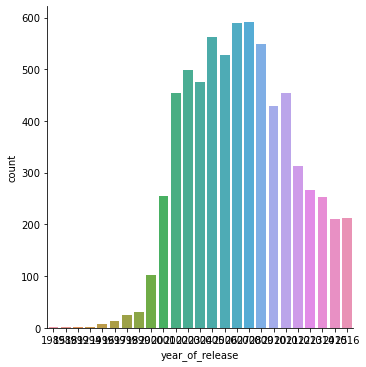

In [23]:
sns.catplot(x="year_of_release", kind="count", data=data)

In [24]:
data_sales.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
#Больше всего продаж у первых шести платформ: PS2, X360, PS3, Wii, DS, PS

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

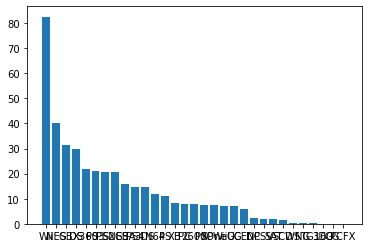

In [25]:
plt.bar(data_sales['platform'], data_sales['total_sales'])
plt.show()

Из графика видно, что большая часть предстваленных платформ не добильсь значительного коммерческого успеха, много денег принесли только единицы.

array([[<AxesSubplot:title={'center':'year_of_release'}>]], dtype=object)

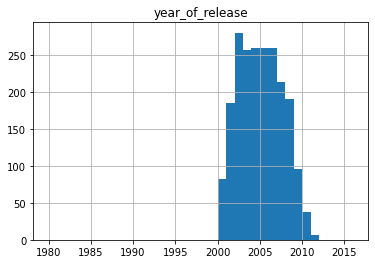

In [26]:
#Распределение по годам игр на платформе PS2
data_sales.query('platform == "PS2"').hist('year_of_release', grid=True, range = (1980, 2016), bins=36)

In [27]:
#Временной период, который просуществовала платформа PS2 по годам и сколько игр было выпущено в каждом году
data_sales.query('platform == "PS2"').pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values(by=('year_of_release'), ascending=False)

,name
year_of_release,
2011,7
2010,38
2009,96
2008,191
2007,214
2006,259
2005,260
2004,259
2003,256


array([[<AxesSubplot:title={'center':'year_of_release'}>]], dtype=object)

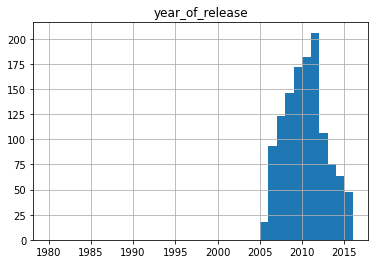

In [28]:
#Распределение по годам игр на платформе X360
data_sales.query('platform == "X360"').hist('year_of_release', grid=True, range = (1980, 2016), bins=36)

In [29]:
#Временной период, который просуществовала платформа X360 по годам и сколько игр было выпущено в каждом году
data_sales.query('platform == "X360"').pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values(by=('year_of_release'), ascending=False)

,name
year_of_release,
2016,13
2015,35
2014,63
2013,75
2012,106
2011,206
2010,182
2009,172
2008,146


array([[<AxesSubplot:title={'center':'year_of_release'}>]], dtype=object)

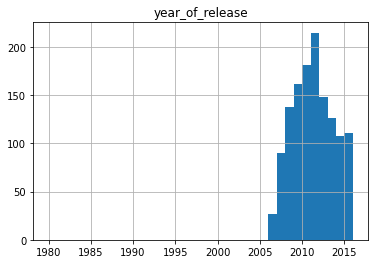

In [30]:
#Распределение по годам игр на платформе PS3
data_sales.query('platform == "PS3"').hist('year_of_release', grid=True, range = (1980, 2016), bins=36)

In [31]:
#Временной период, который просуществовала платформа PS3 по годам и сколько игр было выпущено в каждом году
data_sales.query('platform == "PS3"').pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values(by=('year_of_release'), ascending=False)

,name
year_of_release,
2016,38
2015,73
2014,108
2013,126
2012,148
2011,215
2010,181
2009,162
2008,138


array([[<AxesSubplot:title={'center':'year_of_release'}>]], dtype=object)

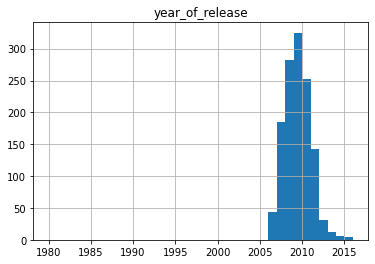

In [32]:
#Распределение по годам игр на платформе Wii
data_sales.query('platform == "Wii"').hist('year_of_release', grid=True, range = (1980, 2016), bins=36)

In [33]:
#Временной период, который просуществовала платформа Wii по годам и сколько игр было выпущено в каждом году
data_sales.query('platform == "Wii"').pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values(by=('year_of_release'), ascending=False)

,name
year_of_release,
2016,1
2015,4
2014,6
2013,12
2012,31
2011,143
2010,253
2009,325
2008,282


array([[<AxesSubplot:title={'center':'year_of_release'}>]], dtype=object)

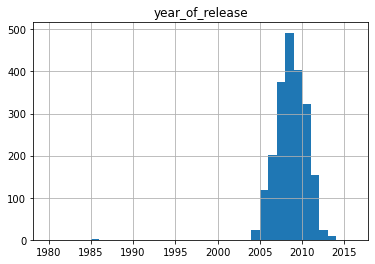

In [34]:
#Распределение по годам ирг на платформе DS
data_sales.query('platform == "DS"').hist('year_of_release', grid=True, range = (1980, 2016), bins=36)

In [35]:
#Временной период, который просуществовала платформа DS по годам и сколько игр было выпущено в каждом году
data_sales.query('platform == "DS"').pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values(by=('year_of_release'), ascending=False)

,name
year_of_release,
2013,8
2012,23
2011,153
2010,323
2009,403
2008,492
2007,376
2006,201
2005,118


array([[<AxesSubplot:title={'center':'year_of_release'}>]], dtype=object)

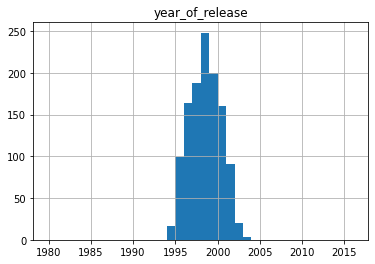

In [36]:
#Распределение по годам игр на платформе PS
data_sales.query('platform == "PS"').hist('year_of_release', grid=True, range = (1980, 2016), bins=36)

In [37]:
#Временной период, который просуществовала платформа PS по годам и сколько игр было выпущено в каждом году
data_sales.query('platform == "PS"').pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values(by=('year_of_release'), ascending=False)

,name
year_of_release,
2003,3
2002,20
2001,91
2000,160
1999,200
1998,248
1997,188
1996,164
1995,99


Из графиков видно, что платформы PS, DS и PS2, хоть некогда и были очень популярны, сейчас (в 2016) игр на них уже не выходит. Распределения также показывают, что 'период жизни' игровой платформы, период от выхода на рынок и до полного забвения, составляет около 10 лет

array([[<AxesSubplot:title={'center':'year_of_release'}>]], dtype=object)

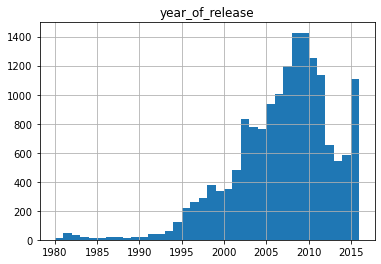

In [38]:
data_sales.hist('year_of_release', grid=True, range = (1980, 2016), bins=36)

Я построил таблицы, на которых видно сколько лет каждая из платформ удостаивается игровых релизов, срок жизни составляет около десяти лет, при этом видно, что распределения юлизки к нормальному. 

Если построить такие распределения по всем платформам, можно найти те, которые еще молодые (3-5 лет на рынке) и, следовательно, еще не прошли свой пик популярности и перпективны. Хотя более наглядно мы их найдем на следующем пункте


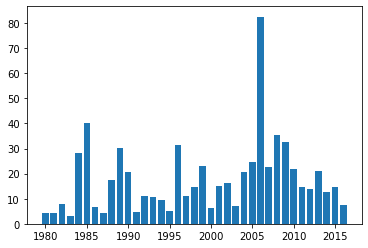

In [39]:
#График распределения продаж по годам
plt.bar(data_sales['year_of_release'], data_sales['total_sales'])
plt.show()

Для дальнейшего анализа я решил взять данные на перод с 2000 по 2016, отбросив незначительные количества игр, выпущенных до 2000

In [40]:
sample_data_sales = data_sales.query('year_of_release >= 2013')
sample_data_sales.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.58


Получается, что нас интересует только близжайшая перспектива и для наших целей подходит только период после пика 2009 года. В таком случае для анализа нужно выбрать данные с 2013 года (пик прошел - часть платформ ушли с рынка, появляются новые преспективные платформы. Также согласуется с тем фактом, что платформа живет около 10 лет. Рассматривая последние 4 года, мы найдем молодые перспективные платформы)

array([[<AxesSubplot:title={'center':'year_of_release'}>]], dtype=object)

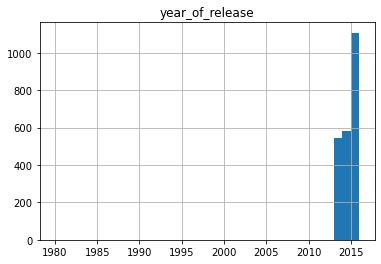

In [41]:
sample_data_sales.hist('year_of_release', grid=True, range = (1980, 2016), bins=36)

In [42]:
top_10 = sample_data_sales.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
top_10

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
Name: total_sales, dtype: float64

Отлично! Оставив только современные платформы я получил топ наиболее перспективных и активно растущих. Далее посмотрим на их распределения

array([[<AxesSubplot:title={'center':'year_of_release'}>]], dtype=object)

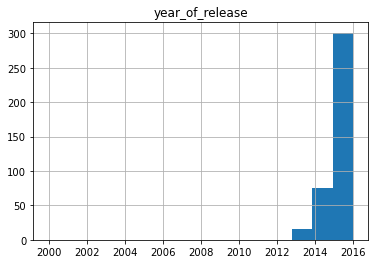

In [43]:
#Расприделение для PS4
sample_data_sales.query('platform == "PS4"').hist('year_of_release', grid=True, range = (2000, 2016), bins=15)

array([[<AxesSubplot:title={'center':'year_of_release'}>]], dtype=object)

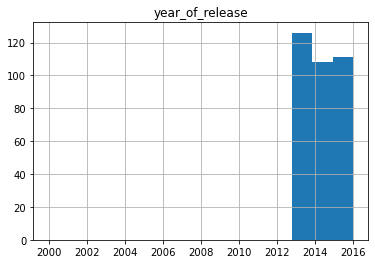

In [44]:
#Расприделение для PS3
sample_data_sales.query('platform == "PS3"').hist('year_of_release', grid=True, range = (2000, 2016), bins=15)

array([[<AxesSubplot:title={'center':'year_of_release'}>]], dtype=object)

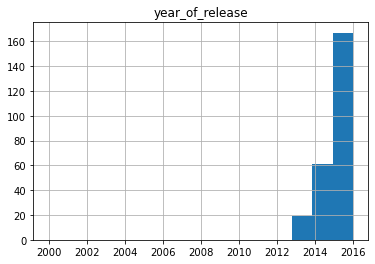

In [45]:
#Расприделение для XOne
sample_data_sales.query('platform == "XOne"').hist('year_of_release', grid=True, range = (2000, 2016), bins=15)

array([[<AxesSubplot:title={'center':'year_of_release'}>]], dtype=object)

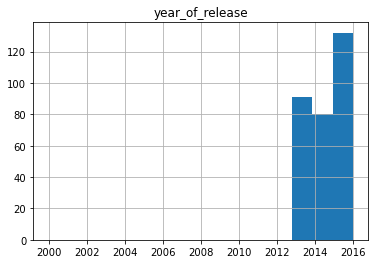

In [46]:
#Расприделение для 3DS
sample_data_sales.query('platform == "3DS"').hist('year_of_release', grid=True, range = (2000, 2016), bins=15)

array([[<AxesSubplot:title={'center':'year_of_release'}>]], dtype=object)

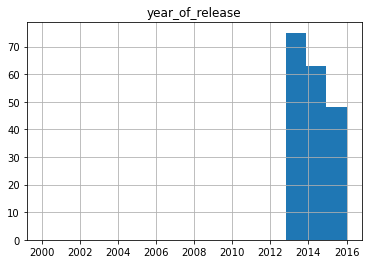

In [47]:
#Расприделение для X360
sample_data_sales.query('platform == "X360"').hist('year_of_release', grid=True, range = (2000, 2016), bins=15)

На графиках, построенных по данным из выбраного промежутка (с 2013 по 2016) виды платформы, которые показывают восходящую динамику популярности. К ним относятся: PS4, XOne, 3DS. У PS3 также высокая популярность, можно ожидать, что она сохранится некоторое время.


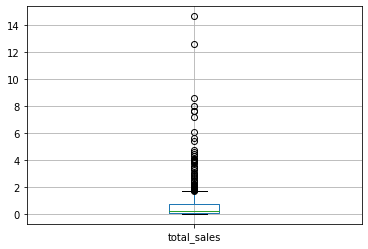

In [48]:
#Распределение продаж игр на платформе PS4
sample_data_sales.query('platform == "PS4"').boxplot(column='total_sales')
plt.show()

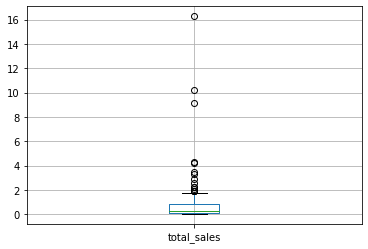

In [49]:
#Распределение продаж игр на платформе X360
sample_data_sales.query('platform == "X360"').boxplot(column='total_sales')
plt.show()

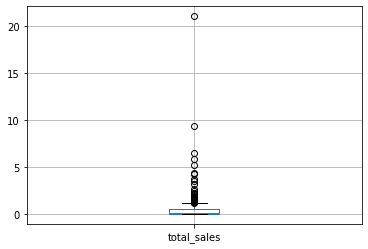

In [50]:
#Распределение продаж игр на платформе PS3
sample_data_sales.query('platform == "PS3"').boxplot(column='total_sales')
plt.show()

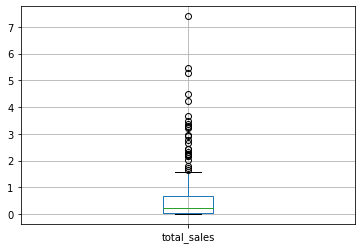

In [51]:
#Распределение продаж игр на платформе XOne
sample_data_sales.query('platform == "XOne"').boxplot(column='total_sales')
plt.show()

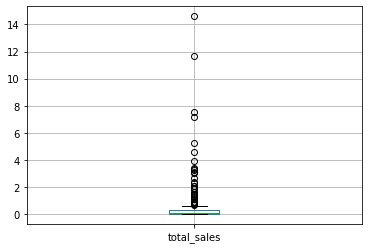

In [52]:
#Распределение продаж игр на платформе 3DS
sample_data_sales.query('platform == "3DS"').boxplot(column='total_sales')
plt.show()

По "ящикам с усами" продаж на различных платформах видно, что большая часть игр, выходивших на платформах, собирает довольно скромнуюкассу, только отдельные игры становятся хитами, собирая десятки миллионов долларов.
Данные на построенных графиках группируются около нуля

Чем шире ящик, тем больше разброс сборов у игр, выходящей на данной платформе. Так как нас интересуют максимально перспективные платформы, то чем шире ящик, тем лучше. Также, все выбросы обозначают игры, собравшие аномально большую кассу, так что платформы с большим количеством таких хитов также очень перспективны

In [53]:
#Средние общие продажи по платформам
sample_data_sales.pivot_table(index='platform', values='total_sales', aggfunc=['count','mean']).sort_values(by=('mean','total_sales'), ascending=False)

,count,mean
,total_sales,total_sales
platform,,
PS4,392,0.801378
X360,186,0.735484
XOne,247,0.645020
Wii,23,0.593913
WiiU,115,0.562000
PS3,345,0.525884
3DS,303,0.472772
PC,189,0.208624


В суммарных продажах по платформам наблюдается значительная разница между выручкой от средней игры и суммарными продажами всех игр на платформе (топ средних продаж отличается от топа совокупных). Несколько успешно продавшихся игра не делает платформу популярной, важнее, чтобы на платформе выпускалось много игр, даже если каждая из них соберет не большую кассу.

In [54]:
#Следующая часть касается отзывов, пришло время привести к рабочей форме второй датасет (убрать игры до 2000):
data_sample = data.query('year_of_release >= 2013')
data_sample.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
10,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
13,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
27,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
38,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
46,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36


In [55]:
#Для анализа влияния отзывов возьму самую популярную платформу: PS2
data_sample.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head()

platform
PS4     243.00
XOne    129.48
PS3     113.57
X360     84.92
WiiU     51.23
Name: total_sales, dtype: float64

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

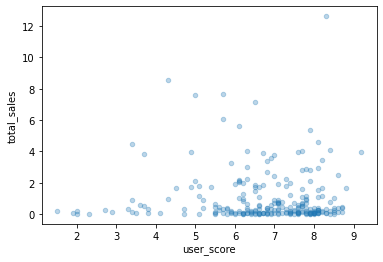

In [56]:
#Отражение зависимости между продажами и отзывами пользователей PS4
ps4 = data_sample.query('platform == "PS4"')
ps4.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3) 

In [57]:
ps4['user_score'].corr(ps4['total_sales'])

-0.03088781296873361

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

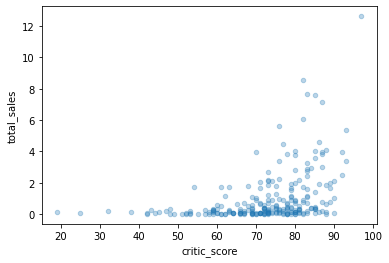

In [58]:
#Отражение зависимости между продажами и отзывами критиков
ps4.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3) 

In [59]:
ps4['critic_score'].corr(ps4['total_sales'])

0.4035729107357779

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

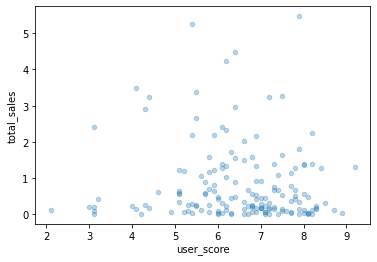

In [60]:
#Отражение зависимости между продажами и отзывами пользователей XOne
XOne = data_sample.query('platform == "XOne"')
XOne.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3) 

In [61]:
XOne['user_score'].corr(XOne['total_sales'])

-0.07591595053938054

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

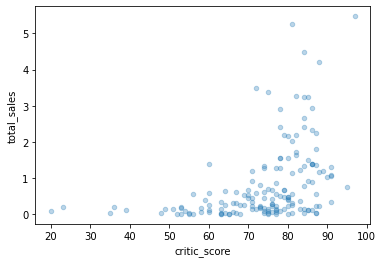

In [62]:
#Отражение зависимости между продажами и отзывами критиков XOne
XOne.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3) 

In [63]:
XOne['critic_score'].corr(XOne['total_sales'])

0.4099295868860112

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

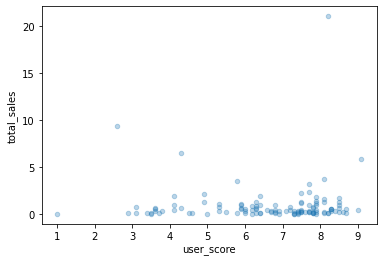

In [64]:
#Отражение зависимости между продажами и отзывами пользователей PS3
PS3 = data_sample.query('platform == "PS3"')
PS3.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3) 

In [65]:
PS3['user_score'].corr(PS3['total_sales'])

0.02627973401765723

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

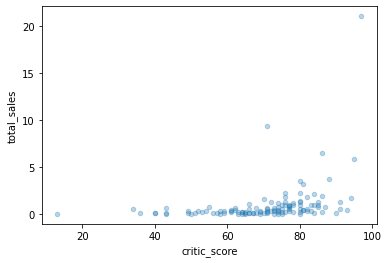

In [66]:
#Отражение зависимости между продажами и отзывами критиков XOne
PS3.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3)

In [67]:
PS3['critic_score'].corr(PS3['total_sales'])

0.3341562190312723

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

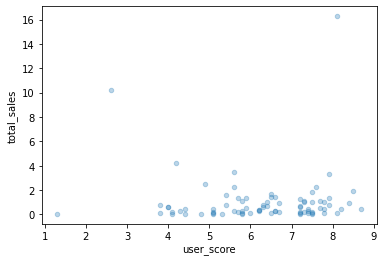

In [68]:
#Отражение зависимости между продажами и отзывами пользователей X360
X360 = data_sample.query('platform == "X360"')
X360.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3) 

In [69]:
X360['user_score'].corr(X360['total_sales'])

-0.00038951394796935527

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

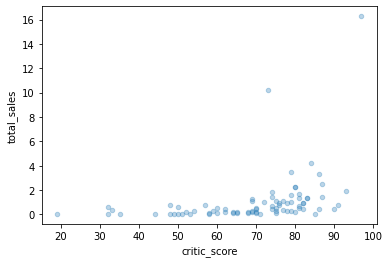

In [70]:
#Отражение зависимости между продажами и отзывами критиков X360
X360.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3)

In [71]:
X360['critic_score'].corr(X360['total_sales'])

0.3545006636942353

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

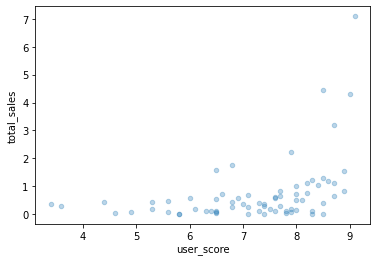

In [72]:
#Отражение зависимости между продажами и отзывами пользователей WiiU
WiiU = data_sample.query('platform == "WiiU"')
WiiU.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3)

In [73]:
WiiU['user_score'].corr(WiiU['total_sales'])

0.4086917438492649

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

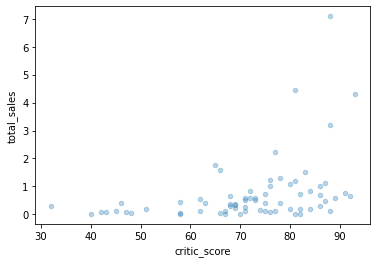

In [74]:
#Отражение зависимости между продажами и отзывами критиков WiiU
WiiU.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3)

In [75]:
WiiU['critic_score'].corr(WiiU['total_sales'])

0.3795044989978415

Выявлена незначительная положительная связь между продажами игр и оценками критиков. Между продажами игр и оценками пользователей связи почти нет. Из общего тренда выбивается только платформа WiiU. 
Чем выше оценки, тем лучше продается игра, но это не гарантировано, тем не менее на оценки критиков можно ориентироваться. 

Может быть пользовательские оценки крайне разнообразны, тогда как у критиков есть более объективное мнение относительно качества игры, к которому прислушиваются люди, принемая решение о покупке.

In [76]:
#Для анализа по жанрам я снова возьму датасет без оценок, но с большим количеством строк
sample_data_sales.pivot_table(index='genre', values='total_sales', aggfunc=['count', 'sum', 'mean']).sort_values(by=('count','total_sales'), ascending=False)

,count,sum,mean
,total_sales,total_sales,total_sales
genre,,,
Action,766,321.87,0.420196
Role-Playing,292,145.89,0.499623
Adventure,245,23.64,0.096490
Sports,214,150.65,0.703972
Shooter,187,232.98,1.245882
Misc,155,62.82,0.405290
Racing,85,39.89,0.469294
Fighting,80,35.31,0.441375


Самое большое количество игр выходит в жанре Action, далее идут Sports и Misc. Непопурярные жанры: Puzzle, Strategy и Fighting. 
Самым прибыльным (по среднему заработку за игру) является жанр Shooter, следом за ним идет Platform
Самый неприбыльный жанр - Adventure, игры этой тематики плохо продаются и мало собирают. Игроки мало покупают игры в жарнах Strategy и Puzzle, видимо поэтому их и выпускают так мало. 

# Портрет пользователя каждого региона

In [77]:
#Топ продаж по платформам в Северной Америке
plat_na = sample_data_sales.pivot_table(index='platform', values='na_sales', aggfunc=['count', 'sum', 'mean']).sort_values(by=('sum','na_sales'), ascending=False).head()
plat_na

,count,sum,mean
,na_sales,na_sales,na_sales
platform,,,
PS4,392,108.74,0.277398
XOne,247,93.12,0.377004
X360,186,81.66,0.439032
PS3,345,63.50,0.184058
3DS,303,38.20,0.126073


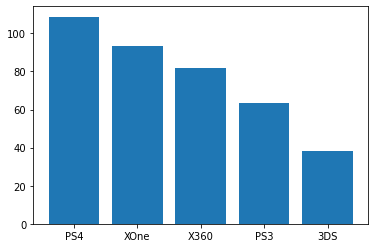

In [78]:
#График распределения продаж по платформам
plt.bar(plat_na.index, plat_na[('sum','na_sales')])
plt.show()

Больше всего жители Северной Америки заплатили денег за игры на платфоме X360, на втором месте PS2, замыкает тройку лидеров платформа Wii, средние продажи одной игры на этих платформах также относительно высоки. Примечательно, что платформам X360 и Wii удалось собрать большую совокупную кассу при относительно небольшом количестве выпущенных игр, учитывая высокие средние сборы, видимо, многие из них становились хитами

In [79]:
#Топ продаж в Северной Америке по жанрам
sales_na = sample_data_sales.pivot_table(index='genre', values='na_sales', aggfunc=['count', 'sum', 'mean']).sort_values(by=('sum','na_sales'), ascending=False).head()
sales_na

,count,sum,mean
,na_sales,na_sales,na_sales
genre,,,
Action,766,126.05,0.164556
Shooter,187,109.74,0.586845
Sports,214,65.27,0.305000
Role-Playing,292,46.40,0.158904
Misc,155,27.49,0.177355


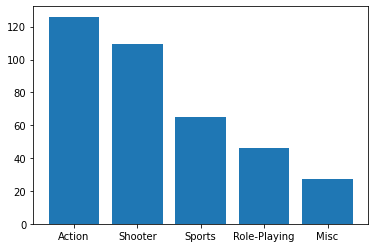

In [80]:
#График распределения продаж по жанрам
plt.bar(sales_na.index, sales_na[('sum','na_sales')])
plt.show()

Самым популярным является жанр Action, таких игр вышло больше всего и, их совокупные сборы также значительно опережают игры других жанров. Спортивные игры и шутеры также в тройке лидеров, интрересен также тот факт, что не смотря на небольшое относительно других топовых жанров количество выпушенных шутеров, средняя игра продалась значительно лучше, чем и обеспечила большую совокупную кассу

In [81]:
#Теперь можно увидеть игры без рейтингов
data_copy['rating'] = data_copy['rating'].fillna(value='not_raited') 
data_copy.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [82]:
#Топ продаж в Северной Америке по рейтинагм ESRB (датасет с рейтингами data_sample)
raiting_na = data_copy.pivot_table(index='rating', values='na_sales', aggfunc=['count', 'sum', 'mean']).sort_values(by=('sum','na_sales'), ascending=False)
raiting_na

,count,sum,mean
,na_sales,na_sales,na_sales
rating,,,
E,3921,1274.24,0.324978
not_raited,6676,1225.84,0.183619
T,2905,747.60,0.257349
M,1536,742.89,0.483652
E10+,1393,345.50,0.248026
K-A,3,2.56,0.853333
EC,8,1.53,0.191250
AO,1,1.26,1.260000


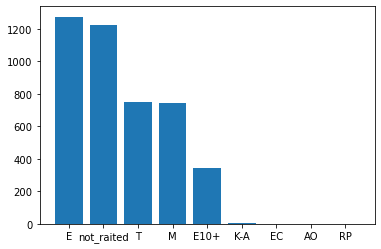

In [83]:
#График распределения рейтиногов в Северной Америке
plt.bar(raiting_na.index, raiting_na[('sum','na_sales')])
plt.show()

Есть существенные различия в сборах по игровым рейтингам. Больше всего денег приносят игры рейтина Е, их выходит и самое большое количество, рейтинг М же лидирует по средним сборам игры (совокупная касса большая, не смотря на третье место по количеству)

In [84]:
#Топ продаж по платформам в Европе
plt_eu = sample_data_sales.pivot_table(index='platform', values='eu_sales', aggfunc=['count', 'sum', 'mean']).sort_values(by=('sum','eu_sales'), ascending=False).head()
plt_eu

,count,sum,mean
,eu_sales,eu_sales,eu_sales
platform,,,
PS4,392,141.09,0.359923
PS3,345,67.81,0.196551
XOne,247,51.59,0.208866
X360,186,42.52,0.228602
3DS,303,30.96,0.102178


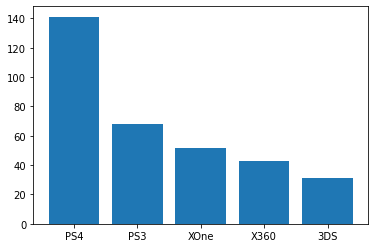

In [85]:
#График распределения продаж по платформам
plt.bar(plt_eu.index, plt_eu[('sum','eu_sales')])
plt.show()

В Европе первую строчку по попурярности и по сборам занимает платформа PS2. На PS3 выходит значительно меньше игр, но их средний доход значительно выше, что дает большую совокупную кассу. Замыкает тройку лидеров платформа X360. Примечательно, что DS на пятом месте. На ней выпущено юолее 2000 игр, но многие из них явно не понравились пользователям, средний доход игры всего 0.09 млн $

In [86]:
#Топ продаж в Европе по жанрам
ganr_eu = sample_data_sales.pivot_table(index='genre', values='eu_sales', aggfunc=['count', 'sum', 'mean']).sort_values(by=('sum','eu_sales'), ascending=False).head()
ganr_eu

,count,sum,mean
,eu_sales,eu_sales,eu_sales
genre,,,
Action,766,118.13,0.154217
Shooter,187,87.86,0.469840
Sports,214,60.52,0.282804
Role-Playing,292,36.97,0.126610
Racing,85,20.19,0.237529


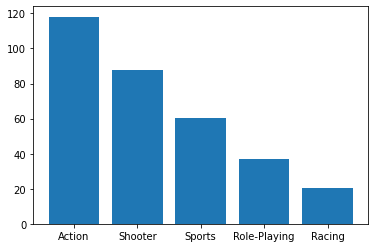

In [87]:
#График распределения продаж по жанрам
plt.bar(ganr_eu.index, ganr_eu[('sum','eu_sales')])
plt.show()

Расределение продаж по жанрам в Европе выглядит премерно также, как в Северной Амереке, только на пятом месте тут жанр Гонки. Shooter точно также лидирует по качеству игр, а Action по количеству

In [88]:
#Топ продаж в Европе по рейтинагм ESRB (датасет с рейтингами data_sample)
raiting_eu = data_copy.pivot_table(index='rating', values='eu_sales', aggfunc=['count', 'sum', 'mean']).sort_values(by=('sum','eu_sales'), ascending=False)
raiting_eu

,count,sum,mean
,eu_sales,eu_sales,eu_sales
rating,,,
E,3921,703.87,0.179513
not_raited,6676,609.65,0.091320
M,1536,480.00,0.312500
T,2905,421.79,0.145194
E10+,1393,183.35,0.131622
AO,1,0.61,0.610000
K-A,3,0.27,0.090000
EC,8,0.11,0.013750


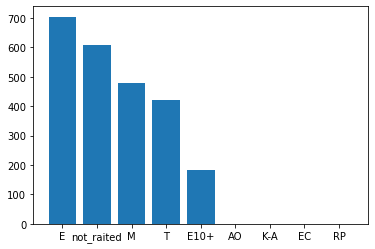

In [89]:
#График распределения рейтиногов в Европе
plt.bar(raiting_eu.index, raiting_eu[('sum','eu_sales')])
plt.show()

Также, как и в Северной Америке, в Европе выходят игры в четырех категориях: Е, М, Е и Е10+. Продажи по этим возрастным категориям распеделены точно в таком же порядке. В категориях Е и М игр было выпущено больше всего. 

In [90]:
#Топ продаж по платформам в Японии
plat_jp = sample_data_sales.pivot_table(index='platform', values='jp_sales', aggfunc=['count', 'sum', 'mean']).sort_values(by=('sum','jp_sales'), ascending=False).head()
plat_jp

,count,sum,mean
,jp_sales,jp_sales,jp_sales
platform,,,
3DS,303,67.81,0.223795
PS3,345,23.35,0.067681
PSV,358,18.59,0.051927
PS4,392,15.96,0.040714
WiiU,115,10.88,0.094609


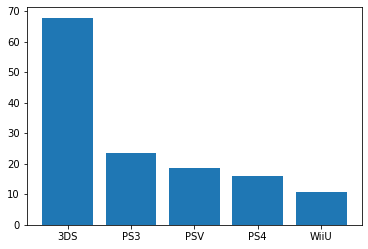

In [91]:
#График распределения продаж по платформам
plt.bar(plat_jp.index, plat_jp[('sum','jp_sales')])
plt.show()

В Японии в лидерах как по количеству выпущенных игр, так и общим сборам платформа DS. На втором месте PS2, она близка по характеристикам к лидеру продаж. Примечательно третье место: 3DS. На данной платформе вышло в четыре раза меньше игр, чем на каждой из двух других, но их средние продажи высоки, что обеспечило хорошие совокупные сборы

In [92]:
#Топ продаж в Японии по жанрам
ganr_jp = sample_data_sales.pivot_table(index='genre', values='jp_sales', aggfunc=['count', 'sum', 'mean']).sort_values(by=('sum','jp_sales'), ascending=False).head()
ganr_jp

,count,sum,mean
,jp_sales,jp_sales,jp_sales
genre,,,
Role-Playing,292,51.04,0.174795
Action,766,40.49,0.052859
Misc,155,9.20,0.059355
Fighting,80,7.65,0.095625
Shooter,187,6.61,0.035348


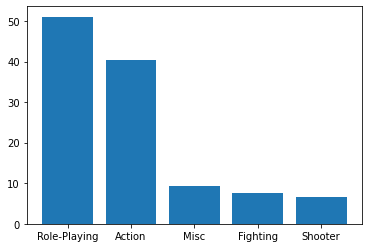

In [93]:
#График распределения продаж по жанрам
plt.bar(ganr_jp.index, ganr_jp[('sum','jp_sales')])
plt.show()

Больше всего в Японии собирает жанр Ролевых игр, эти игры лучше всего продаются не смотря на сравнительно не больше количество. Остальная часть топа выглядит вполне привычно: дале по популярности идут игры жанров Action, Misc, Sports и Platform

In [94]:
#Топ продаж в Японии по рейтинагм ESRB (датасет с рейтингами data_sample)
raiting_jp = data_copy.pivot_table(index='rating', values='jp_sales', aggfunc=['count', 'sum', 'mean']).sort_values(by=('sum','jp_sales'), ascending=False)
raiting_jp

,count,sum,mean
,jp_sales,jp_sales,jp_sales
rating,,,
not_raited,6676,836.74,0.125336
E,3921,197.96,0.050487
T,2905,150.70,0.051876
M,1536,63.58,0.041393
E10+,1393,40.20,0.028859
K-A,3,1.46,0.486667
AO,1,0.00,0.000000
EC,8,0.00,0.000000


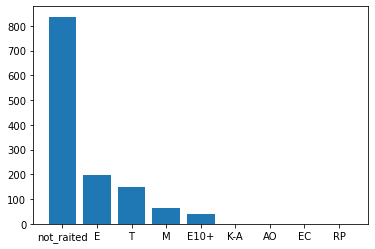

In [95]:
#График распределения рейтиногов в Японии
plt.bar(raiting_jp.index, raiting_jp[('sum','jp_sales')])
plt.show()

Японское распределение по жанрам отличается от двух других. Больше всего игр и сборов приходится на возрастные рейтинги Е и Т, тогда как игр в категории М выходит меньше и принимают их более прохладно

Игры без рейтинаг занимают большую часть игрового рынка в каждом из трех регионов. В Японии даже лидируют. Такчто отсутствие у игры рейтинга не говорит о ее неуспешности

В распределении продаж по рейтингам большой разницы между игроками из различных регионов нет. Но, что касается жанровых предпочтений, то тут восточный игрок сильно отличается от западного, отдавай предпочтение играм жанра Role-Playing. Также в различных регионах есть свои платформы-фавориты.

# Исследование статистических показателей

In [96]:
#Распределение оценок критиков по жанрам
data_sample.pivot_table(index='genre', values='critic_score', aggfunc=['count', 'mean', 'std', 'var']).sort_values(by=('count','critic_score'), ascending=False)

,count,mean,std,var
,critic_score,critic_score,critic_score,critic_score
genre,,,,
Action,301,71.631229,11.906310,141.760221
Shooter,130,73.153846,12.840984,164.890877
Role-Playing,125,73.352000,11.888769,141.342839
Sports,106,72.858491,15.424432,237.913118
Racing,59,71.423729,13.896419,193.110462
Platform,50,73.780000,14.459359,209.073061
Fighting,41,69.951220,13.089979,171.347561
Misc,41,73.926829,8.131391,66.119512


Не смотря на то, что количество игр отличается от жанра к жанру, оценки критиков обладают примерно одинаковыми средними и мерами разброса. Построю несколько гистограм, чтобы это проиллюстрировать.

Text(0.5, 1.0, 'Распределение оценок критиков в жанре Action')

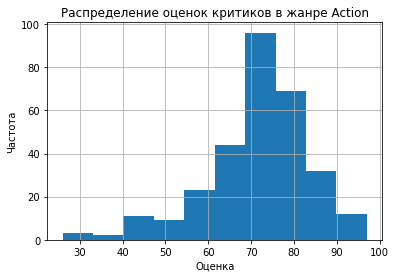

In [97]:
#Распределение оценок критиков в жанре Action 
data_sample.query('genre == "Action"')['critic_score'].hist()
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.title('Распределение оценок критиков в жанре Action')

Text(0.5, 1.0, 'Распределение оценок критиков в жанре Shooter ')

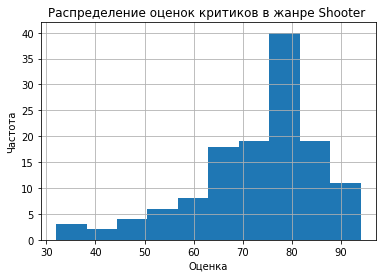

In [98]:
#Распределение оценок критиков в жанре Shooter 
data_sample.query('genre == "Shooter"')['critic_score'].hist()
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.title('Распределение оценок критиков в жанре Shooter ')

Text(0.5, 1.0, 'Распределение оценок критиков в жанре Role-Playing ')

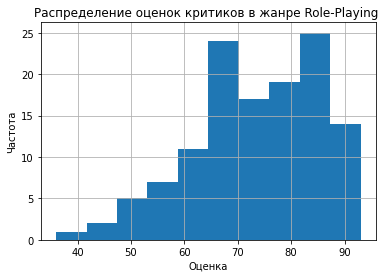

In [99]:
#Распределение оценок критиков в жанре Role-Playing 
data_sample.query('genre == "Role-Playing"')['critic_score'].hist()
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.title('Распределение оценок критиков в жанре Role-Playing ')

Text(0.5, 1.0, 'Распределение оценок критиков в жанре Sports ')

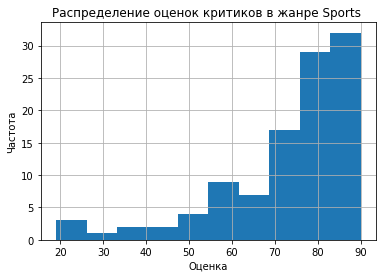

In [100]:
#Распределение оценок критиков в жанре Sports 
data_sample.query('genre == "Sports"')['critic_score'].hist()
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.title('Распределение оценок критиков в жанре Sports ')

Text(0.5, 1.0, 'Распределение оценок критиков в жанре Racing ')

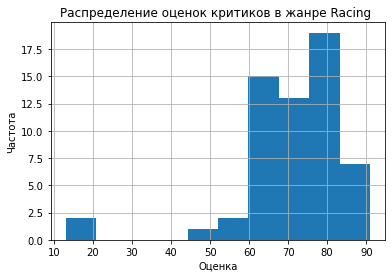

In [101]:
#Распределение оценок критиков в жанре Racing 
data_sample.query('genre == "Racing"')['critic_score'].hist()
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.title('Распределение оценок критиков в жанре Racing ')

Text(0.5, 1.0, 'Распределение оценок критиков в жанре Platform ')

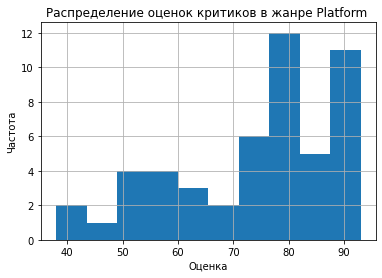

In [102]:
#Распределение оценок критиков в жанре Platform 
data_sample.query('genre == "Platform"')['critic_score'].hist()
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.title('Распределение оценок критиков в жанре Platform ')

Text(0.5, 1.0, 'Распределение оценок критиков в жанре Fighting')

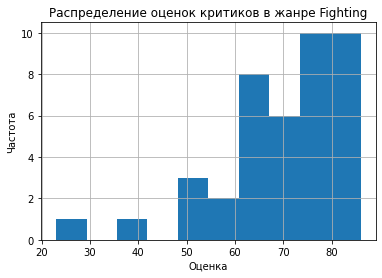

In [103]:
#Распределение оценок критиков в жанре Fighting 
data_sample.query('genre == "Fighting"')['critic_score'].hist()
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.title('Распределение оценок критиков в жанре Fighting')

Text(0.5, 1.0, 'Распределение оценок критиков в жанре Misc ')

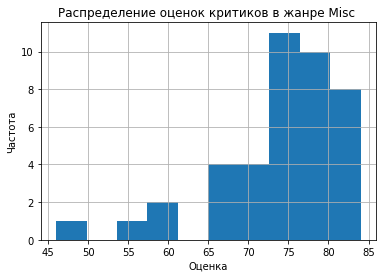

In [104]:
#Распределение оценок критиков в жанре Misc 
data_sample.query('genre == "Misc"')['critic_score'].hist()
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.title('Распределение оценок критиков в жанре Misc ')

Text(0.5, 1.0, 'Распределение оценок критиков в жанре Adventure ')

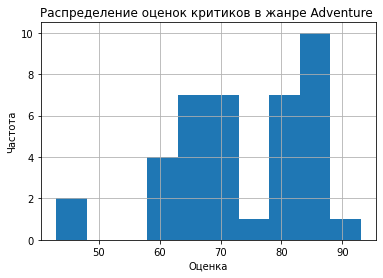

In [105]:
#Распределение оценок критиков в жанре Adventure 
data_sample.query('genre == "Adventure"')['critic_score'].hist()
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.title('Распределение оценок критиков в жанре Adventure ')

Text(0.5, 1.0, 'Распределение оценок критиков в жанре Simulation')

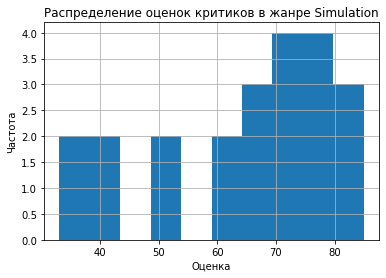

In [106]:
#Распределение оценок критиков в жанре Simulation 
data_sample.query('genre == "Simulation"')['critic_score'].hist()
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.title('Распределение оценок критиков в жанре Simulation')

Text(0.5, 1.0, 'Распределение оценок критиков в жанре Strategy ')

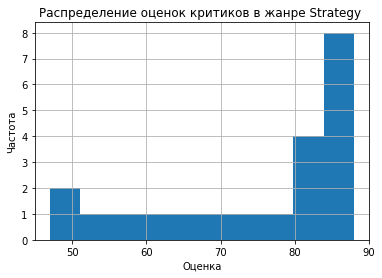

In [107]:
#Распределение оценок критиков в жанре Strategy 
data_sample.query('genre == "Strategy"')['critic_score'].hist()
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.title('Распределение оценок критиков в жанре Strategy ')

Text(0.5, 1.0, 'Распределение оценок критиков в жанре Puzzle ')

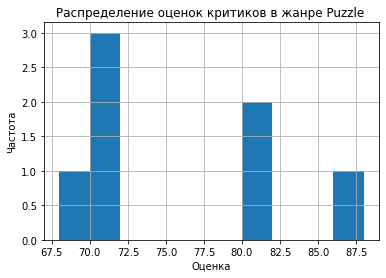

In [108]:
#Распределение оценок критиков в жанре Puzzle 
data_sample.query('genre == "Puzzle"')['critic_score'].hist()
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.title('Распределение оценок критиков в жанре Puzzle ')

Часть распределений оценок критиков похожи на нормальны, но есть и аномалии: Стратегиям редко ставят низкие оценки, а Головоломки, наоборот, реже удостаиваются высоких баллов

In [109]:
#Распределение оценок пользователей по жанрам
data_sample.pivot_table(index='genre', values='user_score', aggfunc=['count', 'mean', 'std', 'var']).sort_values(by=('count','user_score'), ascending=False)

,count,mean,std,var
,user_score,user_score,user_score,user_score
genre,,,,
Action,301,6.913621,1.288532,1.660314
Shooter,130,6.353077,1.508590,2.275843
Role-Playing,125,7.368000,1.222016,1.493323
Sports,106,5.663208,1.466017,2.149205
Racing,59,6.128814,1.670851,2.791742
Platform,50,6.860000,1.699099,2.886939
Fighting,41,7.046341,1.468689,2.157049
Misc,41,7.153659,1.033706,1.068549


Схожая ситуация: игр в жанрах разное количество, а оценки праспределены примерно одинаково. Заметно токже, что пользователи оценивали игры по 10ти бальной школе, тогда как критики использовали стобальную, хотя средняя оценка такая же - 7

Text(0.5, 1.0, 'Распределение оценок пользователей в жанре Action ')

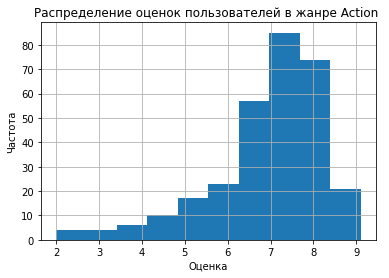

In [110]:
#Распределение оценок пользователей в жанре Action 
data_sample.query('genre == "Action"')['user_score'].hist()
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.title('Распределение оценок пользователей в жанре Action ')

Text(0.5, 1.0, 'Распределение оценок пользователей в жанре Shooter')

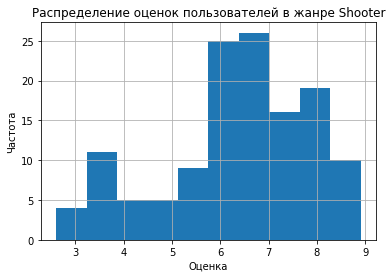

In [111]:
#Распределение оценок пользователей в жанре Shooter 
data_sample.query('genre == "Shooter"')['user_score'].hist()
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.title('Распределение оценок пользователей в жанре Shooter')

Text(0.5, 1.0, 'Распределение оценок пользователей в жанре Role-Playing')

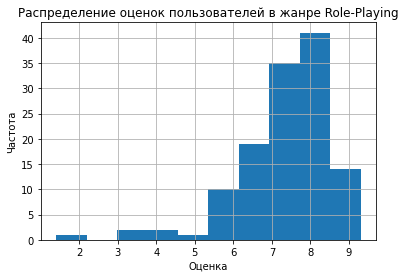

In [112]:
#Распределение оценок пользователей в жанре Role-Playing 
data_sample.query('genre == "Role-Playing"')['user_score'].hist()
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.title('Распределение оценок пользователей в жанре Role-Playing')

Text(0.5, 1.0, 'Распределение оценок пользователей в жанре Sports ')

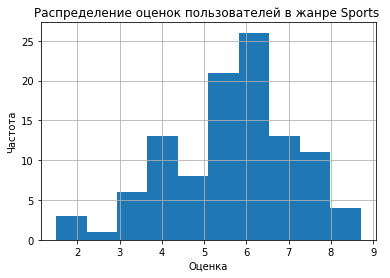

In [113]:
#Распределение оценок пользователей в жанре Sports 
data_sample.query('genre == "Sports"')['user_score'].hist()
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.title('Распределение оценок пользователей в жанре Sports ')

Text(0.5, 1.0, 'Распределение оценок пользователей в жанре Racing ')

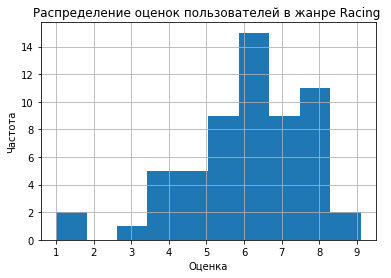

In [114]:
#Распределение оценок пользователей в жанре Racing 
data_sample.query('genre == "Racing"')['user_score'].hist()
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.title('Распределение оценок пользователей в жанре Racing ')

Text(0.5, 1.0, 'Распределение оценок пользователей в жанре Platform ')

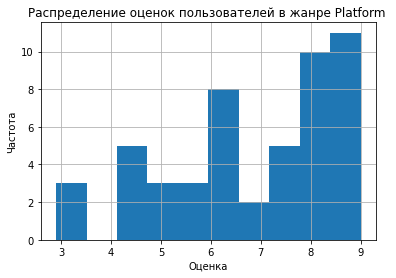

In [115]:
#Распределение оценок пользователей в жанре Platform 
data_sample.query('genre == "Platform"')['user_score'].hist()
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.title('Распределение оценок пользователей в жанре Platform ')

Text(0.5, 1.0, 'Распределение оценок пользователей в жанре Fighting')

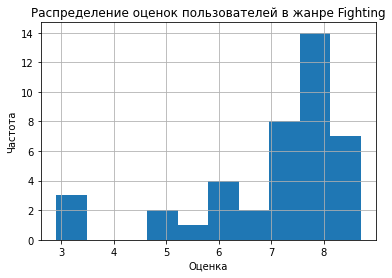

In [116]:
#Распределение оценок пользователей в жанре Fighting 
data_sample.query('genre == "Fighting"')['user_score'].hist()
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.title('Распределение оценок пользователей в жанре Fighting')

Text(0.5, 1.0, 'Распределение оценок пользователей в жанре Misc')

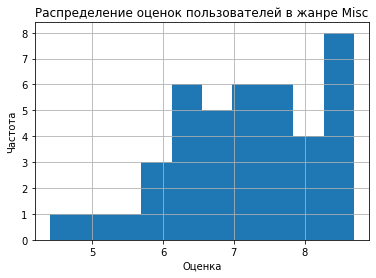

In [117]:
#Распределение оценок пользователей в жанре Misc 
data_sample.query('genre == "Misc"')['user_score'].hist()
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.title('Распределение оценок пользователей в жанре Misc')

Text(0.5, 1.0, 'Распределение оценок пользователей в жанре Adventure ')

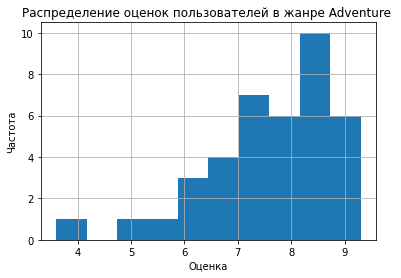

In [118]:
#Распределение оценок пользователей в жанре Adventure 
data_sample.query('genre == "Adventure"')['user_score'].hist()
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.title('Распределение оценок пользователей в жанре Adventure ')

Text(0.5, 1.0, 'Распределение оценок пользователей в жанре Simulation ')

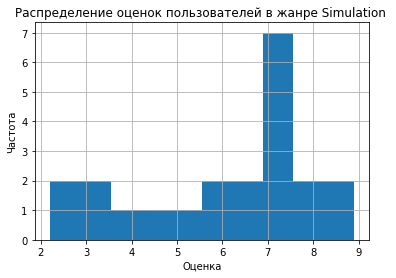

In [119]:
#Распределение оценок пользователей в жанре Simulation 
data_sample.query('genre == "Simulation"')['user_score'].hist()
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.title('Распределение оценок пользователей в жанре Simulation ')

Text(0.5, 1.0, 'Распределение оценок пользователей в жанре Strategy')

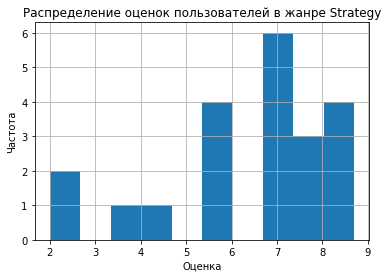

In [120]:
#Распределение оценок пользователей в жанре Strategy 
data_sample.query('genre == "Strategy"')['user_score'].hist()
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.title('Распределение оценок пользователей в жанре Strategy')

Text(0.5, 1.0, 'Распределение оценок пользователей в жанре Puzzle ')

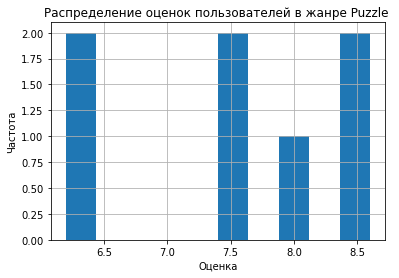

In [121]:
#Распределение оценок пользователей в жанре Puzzle 
data_sample.query('genre == "Puzzle"')['user_score'].hist()
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.title('Распределение оценок пользователей в жанре Puzzle ')

У каждого жанра есть своя специфика распределения пользовательских оценок. Например, Симуляторы чаще всего получают около семи баллов, а пользователи головоломок любят ставить оценки, кратные половине балла

# Проверка гипотез

## Задание на проверку: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Н0: Средние пользовательские рейтинги платформ Xbox One и PC равны
Н1: Средние пользовательские рейтинги платформ Xbox One и PC не равны

(нулевая гипотеза всегда формулируется как равенство)

In [122]:
XOne = data_sample.query('platform == "XOne"')['user_score']
PC = data_sample.query('platform == "PC"')['user_score']

In [123]:
results = st.ttest_ind(XOne, PC)
print('p-значение:', results.pvalue)

if results.pvalue < 0.05: #Уровень значимости 0.05
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.131558554879108
Не получилось отвергнуть нулевую гипотезу


Вывод: Средние пользовательские рейтинги платформ Xbox One и PC не равны. 

## Задание на проверку: Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

Н0: Средние пользовательские рейтинги жанров Action и Sports равны
Н1: Средние пользовательские рейтинги жанров Action и Sports не равны

(нулевая гипотеза всегда формулируется как равенство)

In [124]:
Action = data_sample.query('genre == "Action"')['user_score']
Sports = data_sample.query('genre == "Sports"')['user_score']

In [125]:
results = st.ttest_ind(Action, Sports)
print('p-значение:', results.pvalue)

if results.pvalue < 0.05: #Уровень значимости 0.05
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.7886065917750245e-15
Отвергаем нулевую гипотезу


Отвергнуть нулевую гипотезу, то есть гипотезу о равенстве средних пользовательские рейтинги жанров Action и Sports не удалось, значимых различий в средних не выявлено

# Общий вывод

Проведенный анализ данных, позволил найти несколько важных инсайтов, которые могут быть использованы компанией для увеличения прибыли и повышения эффективности работы.
Принимая решения о покупке игр компании стоит обратить внимение на несколько векторов:
1) Есть как набирающие популярность платформы, так и вышедшие из моды. Стоит закупать игры, вышедшие на платформах, которые только появились или с чьей даты выхода прошло несколько лет. Срок жизни платформы - 10 лет, примерно после пяти попурярность начинает снижаться
2) Лучше всего продаются игры жанра Action и спортивные игры
3) Принимая решения о покупке люди в большей степени ориентируются на оценки критиков, нежели на оценки пользователей - нужно скупать игры с высокими оценками экспертов
4) Целевая аудитория также имеет значение. Регионы имеют свои предпочтения по жанрам и платформам